In [85]:
import fitsio
import numpy as np
from astropy.table import Table,join
from matplotlib import pyplot as plt

In [2]:
f = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/blanc/v2/QSO/alltiles_QSOzinfo.fits')

In [7]:
seld = f['subset'] == 'deep'

In [8]:
fd = f[seld]
len(fd)

9058

In [9]:
len(np.unique(fd['TARGETID']))

8728

In [10]:
len(np.unique(f['TARGETID']))

8728

In [11]:
selq = f['SPECTYPE'] == 'QSO'

In [12]:
fq = f[selq]

In [13]:
len(np.unique(fq['TARGETID']))

2404

In [14]:
np.unique(fq['TARGETS'])

array(['BGS+MWS', 'ELG', 'QSO+LRG'], dtype='<U7')

In [15]:
selbw = fq['TARGETS'] == 'BGS+MWS'

In [16]:
fqle = fq[~selbw]

In [17]:
len(np.unique(fqle['TARGETID']))

2355

In [19]:
np.unique(fqle['TILEID'])

array([80605, 80606, 80607, 80608, 80609, 80610, 80620, 80621, 80622,
       80623], dtype=int32)

In [20]:
sell = fq['TARGETS'] == 'QSO+LRG'

In [21]:
fql = fq[sell]

In [22]:
len(np.unique(fql['TARGETID']))

2098

In [23]:
selqd = selq & seld

In [25]:
fqd = f[selqd]

In [26]:
len(np.unique(fqd['TARGETID']))

2076

In [27]:
len(fqd)

2152

In [28]:
selbw = fqd['TARGETS'] == 'BGS+MWS'

In [47]:
selql = fqd['TARGETS'] == 'QSO+LRG'

In [49]:
tq = np.unique(fqd[selql]['TILEID'])

In [34]:
len(np.unique(fqd['TARGETID'][selql]))

1823

In [35]:
sele = fqd['TARGETS'] == 'ELG'

In [36]:
len(np.unique(fqd['TARGETID'][sele]))

272

In [37]:
selql = fq['TARGETS'] == 'QSO+LRG'

In [38]:
len(np.unique(fq['TARGETID'][selql]))

2098

In [39]:
fzp = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/blanc/zcatalog-blanc-sv1deep.fits')

In [41]:
selc = (fzp['SV1_DESI_TARGET'] & 4) > 0
selc &= fzp['SPECTYPE'] == 'QSO'

In [44]:
len(np.unique(fzp[selc]['TARGETID']))

2076

In [46]:
np.unique(fzp[selc]['TILEID'])

array([80605, 80606, 80607, 80608, 80609, 80610, 80611, 80612, 80613,
       80614, 80616, 80617, 80618, 80619, 80620, 80621, 80622, 80623],
      dtype=int32)

In [50]:
tq

array([80605, 80607, 80609, 80620, 80622], dtype=int32)

In [51]:
selqt = np.isin(fzp[selc]['TILEID'],tq)

In [52]:
len(np.unique(fzp[selc][selqt]['TARGETID']))

1823

In [53]:
len(fzp[selc][selqt])

1823

In [56]:
fen = Table.read('/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/north/matched/ls-dr9.0-DR16Q_v4-match.fits')

In [58]:
from desitarget import targets
fen['TARGETID'] = targets.encode_targetid(fen['OBJID'], fen['BRICKID'], fen['RELEASE'])

In [76]:
fez = fitsio.read('/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/north/matched/DR16Q_v4-match.fits')
print(len(fez),len(fen))
fen['Z_eboss'] = fez['Z']
fen['Z_PCAeboss'] = fez['Z_PCA']

374408 374408


In [75]:
fez.dtype.names

('SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'MJD',
 'FIBERID',
 'AUTOCLASS_PQN',
 'AUTOCLASS_DR14Q',
 'IS_QSO_QN',
 'Z_QN',
 'RANDOM_SELECT',
 'Z_10K',
 'Z_CONF_10K',
 'PIPE_CORR_10K',
 'IS_QSO_10K',
 'THING_ID',
 'Z_VI',
 'Z_CONF',
 'CLASS_PERSON',
 'Z_DR12Q',
 'IS_QSO_DR12Q',
 'Z_DR7Q_SCH',
 'IS_QSO_DR7Q',
 'Z_DR6Q_HW',
 'Z_DR7Q_HW',
 'IS_QSO_FINAL',
 'Z',
 'SOURCE_Z',
 'Z_PIPE',
 'ZWARNING',
 'OBJID',
 'Z_PCA',
 'ZWARN_PCA',
 'DELTACHI2_PCA',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'BOSS_TARGET1',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2'

In [60]:
fa = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/blanc/v2/All/alltiles_Allzinfo.fits')

In [77]:
dje = join(fa,fen,keys=['TARGETID'])

In [62]:
len(dje)

893

In [63]:
len(np.unique(dje['TARGETID']))

165

In [64]:
fes = Table.read('/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/south/matched/ls-dr9.0-DR16Q_v4-match.fits')

In [65]:
fes['TARGETID'] = targets.encode_targetid(fes['OBJID'], fes['BRICKID'], fes['RELEASE'])

In [78]:
fez = fitsio.read('/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/south/matched/DR16Q_v4-match.fits')
print(len(fez),len(fes))
fes['Z_eboss'] = fez['Z']
fes['Z_PCAeboss'] = fez['Z_PCA']

446369 446369


In [79]:
djes = join(fa,fes,keys=['TARGETID'])

In [80]:
len(djes)

2334

In [68]:
len(np.unique(djes['TARGETID']))

522

In [81]:
seld = dje['subset'] == 'deep'
djed = dje[seld]

In [82]:
seld = djes['subset'] == 'deep'
djesd = djes[seld]

In [83]:
print(len(djed),len(djesd))

174 537


(array([404.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,   0.,  89.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

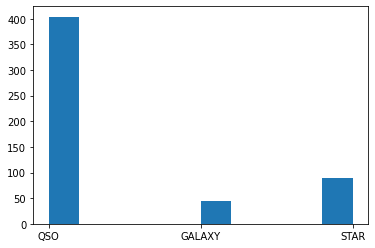

In [87]:
plt.hist(djesd['SPECTYPE'])

(array([126.,   0.,   0.,   0.,   0.,  45.,   0.,   0.,   0.,   3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

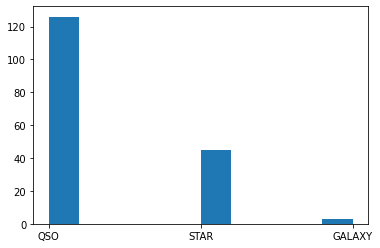

In [88]:
plt.hist(djed['SPECTYPE'])

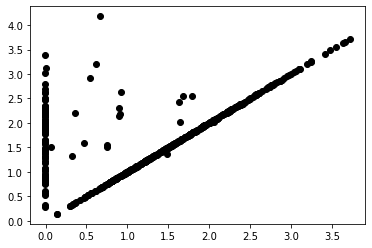

In [90]:
plt.plot(djesd['Z'],djesd['Z_PCAeboss'],'ko')

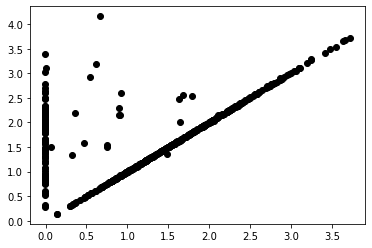

In [92]:
plt.plot(djesd['Z'],djesd['Z_eboss'],'ko')

In [91]:
selqt = djesd['SPECTYPE'] == 'QSO'

Text(0.5, 1.0, 'South deep DESI data, restricting to redrock type QSO')

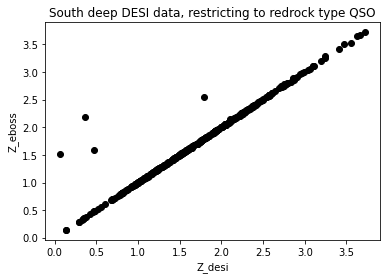

In [107]:
plt.plot(djesd[selqt]['Z'],djesd[selqt]['Z_eboss'],'ko')
plt.xlabel('Z_desi')
plt.ylabel('Z_eboss')
plt.title('South deep DESI data, restricting to redrock type QSO')

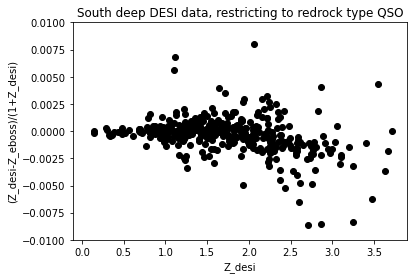

In [106]:
plt.plot(djesd[selqt]['Z'],(djesd[selqt]['Z']-djesd[selqt]['Z_eboss'])/(1+djesd[selqt]['Z']),'ko')
plt.ylim(-0.01,.01)
plt.ylabel('(Z_desi-Z_eboss)/(1+Z_desi)')
plt.xlabel('Z_desi')
plt.title('South deep DESI data, restricting to redrock type QSO')
plt.show()

In [102]:
selo = abs(djesd[selqt]['Z']-djesd[selqt]['Z_eboss']) >  1000./3e5*(1+djesd[selqt]['Z'])

In [103]:
print(len(djesd[selqt][selo]['Z']),len(djesd[selqt]['Z']))

28 404


(array([2., 1., 2., 1., 3., 3., 4., 8., 1., 3.]),
 array([0.06897866, 0.42507182, 0.78116498, 1.13725814, 1.49335129,
        1.84944445, 2.20553761, 2.56163077, 2.91772393, 3.27381709,
        3.62991025]),
 <a list of 10 Patch objects>)

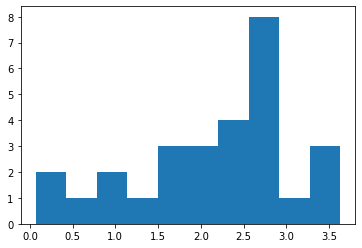

In [104]:
plt.hist(djesd[selqt][selo]['Z'])